# Brain Tumor Detection
Binary Classification: CNN to classigy into Y or N 
Feature Extraction & Clustering: NN to extract features from MRI scans and then apply algorithms to find patterns

Import Libraries and Data

In [29]:
!pip install numpy tensorflow opencv-python matplotlib
!pip install numpy requests Pillow

In [30]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.model_selection import train_test_split
import os
import requests
from PIL import Image
from io import BytesIO
import numpy as np

def load_and_preprocess_image(url, resize_shape=(128, 128), normalize=True):
    try:
        response = requests.get(url)
        response.raise_for_status()  
        image = Image.open(BytesIO(response.content)).convert('RGB')  
        image = image.resize(resize_shape)  # Resize 
        image_array = np.array(image)
        if normalize:
            image_array = image_array / 255.0  
        return image_array, url.split('/')[-1]  #-------------------------
    except Exception as e:
        print(f"Failed to retrieve {url}: {str(e)}")
        return None

image_urls = [
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/1%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/10%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/11%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/12%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/13%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/14%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/15%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/17%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/18%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/19%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/20%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/21%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/22%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/23%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/24%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/25%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/26%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/27%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/28%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/29%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/3%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/30%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/31%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/32%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/33%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/34%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/35%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/36%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/37%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/38%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/39%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/4%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/41%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/42%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/43%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/44no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/45%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/46%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/47%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/48%20no.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/49%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/5%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/50%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/6%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/7%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/8%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/9%20no.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N1.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N11.jpg' ,
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N20.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N2.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N22.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N26.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N5.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/N6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No16.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No18.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No19.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/No22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%201.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2010.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20100.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%202.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%203.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%204.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%205.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%206.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%207.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%208.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2089.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%209.png',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2090.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2091.jpeg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2092.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%20923.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2094.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2095.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2096.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2097.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2098.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no%2099.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/no/no.jpg',
    
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y1.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y10.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y100.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y101.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y102.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y103.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y104.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y105.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y106.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y107.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y108.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y109.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y11.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y111.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y112.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y113.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y114.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y115.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y116.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y117.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y12.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y120.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y13.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y14.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y146.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y147.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y148.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y15.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y153.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y154.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y155.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y156.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y157.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y158.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y159.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y16.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y160.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y161.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y162.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y163.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y164.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y165.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y166.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y167.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y168.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y169.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y17.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y170.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y18.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y180.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y181.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y182.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y183.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y184.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y185.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y186.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y187.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y188.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y19.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y192.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y193.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y194.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y195.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y2.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y20.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y21.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y22.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y23.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y24.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y242.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y243.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y244.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y245.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y246.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y247.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y248.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y249.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y25.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y250.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y251.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y252.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y253.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y254.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y255.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y256.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y257.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y258.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y259.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y26.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y27.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y28.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y29.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y3.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y30.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y31.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y32.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y33.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y34.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y35.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y36.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y37.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y38.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y39.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y4.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y40.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y41.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y42.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y44.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y45.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y46.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y47.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y49.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y50.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y51.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y52.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y53.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y54.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y55.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y56.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y58.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y59.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y6.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y60.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y61.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y62.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y65.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y66.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y67.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y69.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y7.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y70.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y71.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y73.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y74.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y75.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y76.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y77.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y78.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y79.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y8.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y81.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y82.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y85.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y86.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y89.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y9.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y90.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y91.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y92.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y95.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y96.jpg',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y97.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y98.JPG',
    'https://raw.githubusercontent.com/Ariamestra/BrainTumorFinal/main/brain_tumor_dataset/yes/Y99.JPG',
    
]
 # make sure this is populated correctly
images = [load_and_preprocess_image(url) for url in image_urls]
images = [img for img in images if img is not None]  # Filters out failed loads or Nones

#-------------------------------------------
images, titles = zip(*[load_and_preprocess_image(url) for url in image_urls])
images = [img for img, title in zip(images, titles) if img is not None]
titles = [title for img, title in zip(images, titles) if img is not None]
#-------------------------------------

# Check image same shape
print(set([img.shape for img in images]))  

# Convert to a NumPy array 
if all(img is not None and img.shape == (128, 128, 3) for img in images): 
    images = np.array(images)
    labels = np.array([1 if 'yes' in url else 0 for url in image_urls if load_and_preprocess_image(url) is not None])
else:
    print("Not all images are the same shape or some images could not be loaded.")



{(128, 128, 3)}


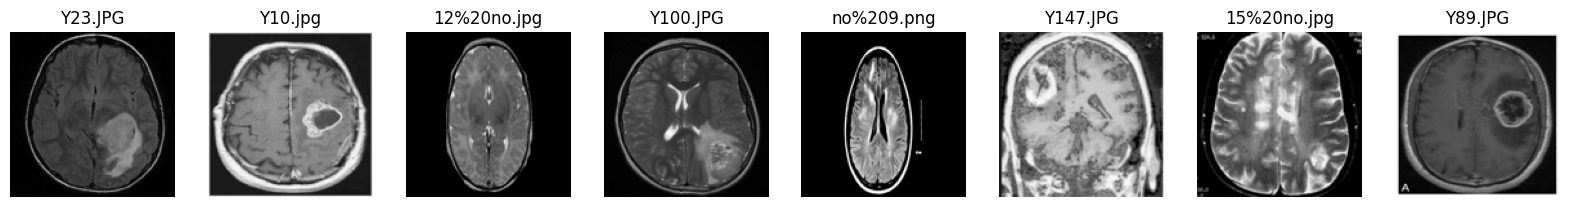

In [31]:
import matplotlib.pyplot as plt
import random

def display_random_images(images, titles, num_images=8):
    if len(images) < num_images:
        print(f"Not enough images to display: have {len(images)}, need {num_images}")
        return

    indices = random.sample(range(len(images)), num_images) # Randomly select images
    
    fig, axes = plt.subplots(1, num_images, figsize=(20, 3))
    for ax, index in zip(axes, indices):
        ax.imshow(images[index])
        ax.set_title(titles[index])
        ax.axis('off')
    plt.show()

display_random_images(images, titles)


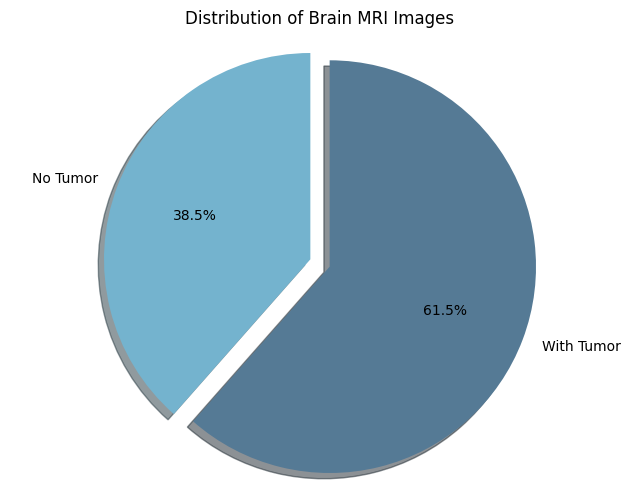

In [32]:
import matplotlib.pyplot as plt
import numpy as np

labels_count = [np.sum(labels == 0), np.sum(labels == 1)]
chart_labels = ['No Tumor', 'With Tumor']
colors = ['#74B3CE', '#557A95']
explode = (0, 0.1)  

plt.figure(figsize=(8, 6))
plt.pie(labels_count, explode=explode, labels=chart_labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  
plt.title('Distribution of Brain MRI Images')
plt.show()


Split Data

In [33]:
images, labels = zip(*[(img, label) for img, label in zip(images, labels) if img is not None])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Debug: Check lengths
print("Number of images:", len(images))
print("Number of labels:", len(labels))

Number of images: 252
Number of labels: 252


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Build the CNN Model

In [35]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,561 (49.36 MB)

 Trainable params: 12,938,561 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.5948 - loss: 1.1142 - val_accuracy: 0.8235 - val_loss: 0.5650
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 327ms/step - accuracy: 0.7604 - loss: 0.5622 - val_accuracy: 0.8039 - val_loss: 0.5190
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 325ms/step - accuracy: 0.7802 - loss: 0.5119 - val_accuracy: 0.8235 - val_loss: 0.4970
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - accuracy: 0.7736 - loss: 0.4801 - val_accuracy: 0.7255 - val_loss: 0.5878
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.8483 - loss: 0.3829 - val_accuracy: 0.8431 - val_loss: 0.4325
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.8241 - loss: 0.3849 - val_accuracy: 0.8431 - val_loss: 0.4547
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 329ms/step - accuracy: 0.8598 - loss: 0.3113 - val_accuracy: 0.8431 - val_loss: 0.4832
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.8779 - loss: 0.2591 - val_accuracy: 0.8627 - val_loss:

Evaluate

In [37]:
'''
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Use the model to make predictions
predictions = model.predict(X_test[:10])
predicted_classes = (predictions > 0.5).astype(int)
'''

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8538 - loss: 0.7814 
Test Accuracy: 0.843137264251709
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


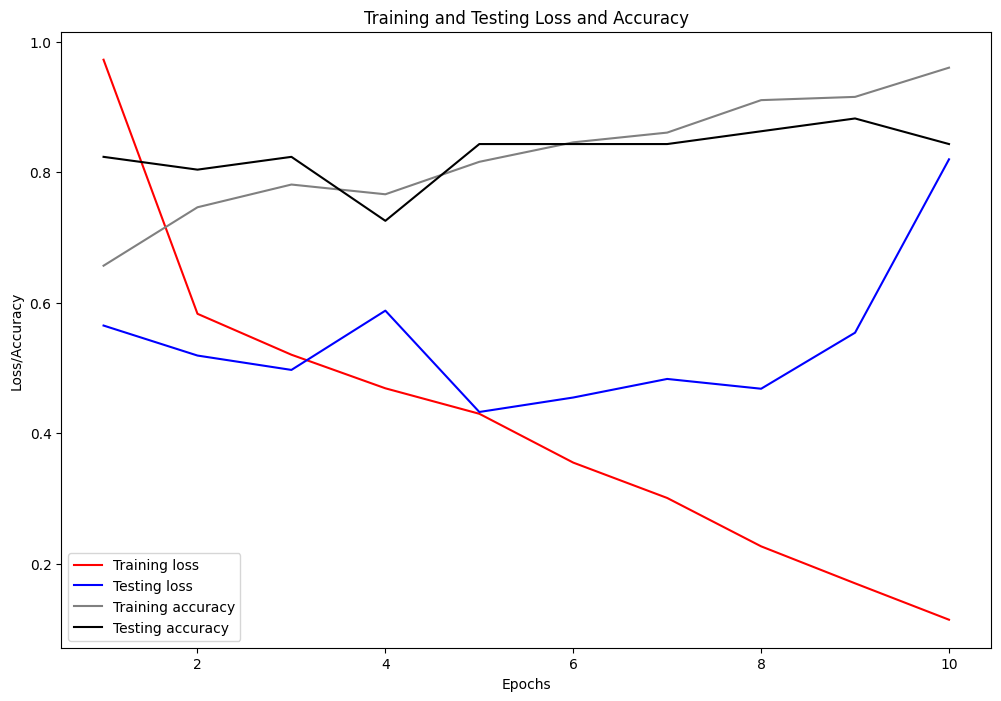

In [41]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
test_loss = history.history['val_loss']
test_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12,8))
plt.plot(epochs, train_loss, 'red', label='Training loss')
plt.plot(epochs, test_loss, 'blue', label='Testing loss')
plt.plot(epochs, train_acc, 'gray', label='Training accuracy')
plt.plot(epochs, test_acc, 'black', label='Testing accuracy')
plt.title('Training and Testing Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


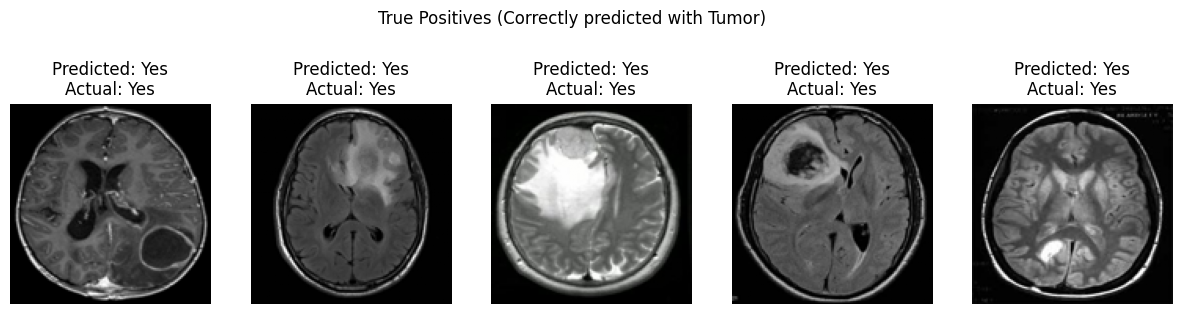

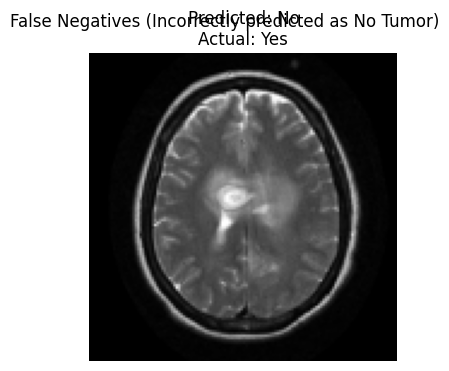

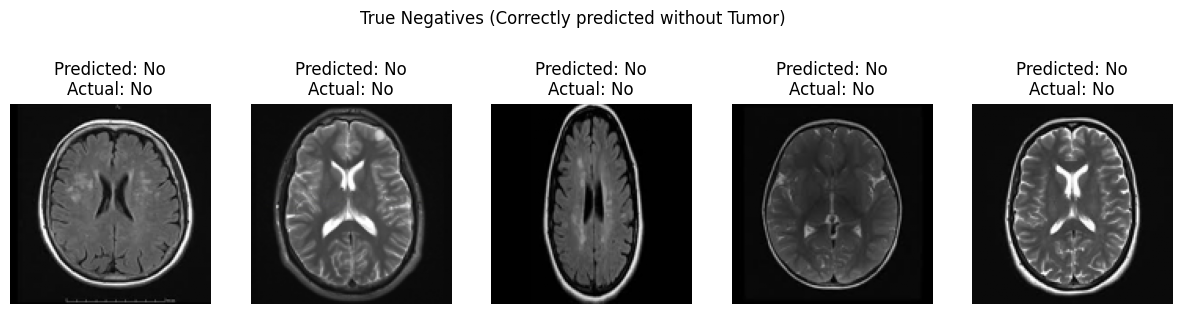

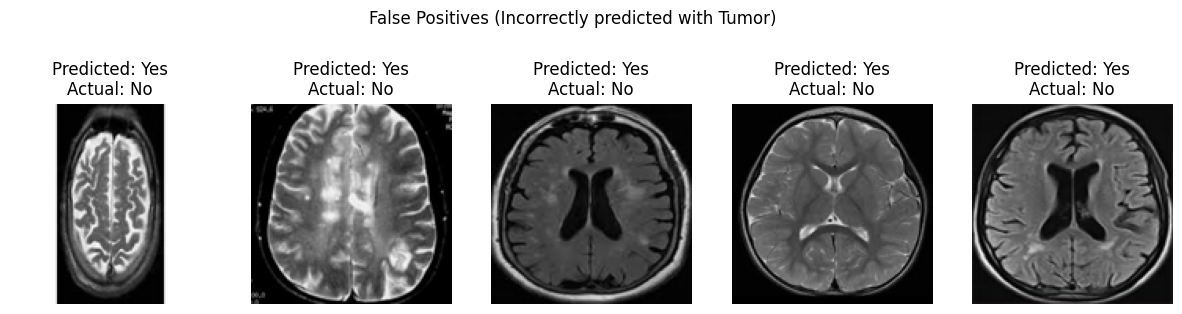

In [42]:
import matplotlib.pyplot as plt

def display_classified_images(X, y_true, y_pred, num_images=5):
    
    true_positives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 1 and pred == 1]
    false_negatives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 1 and pred == 0]
    true_negatives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 0 and pred == 0]
    false_positives = [i for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == 0 and pred == 1]

    def plot_images(indices, title):
        if len(indices) > num_images:
            indices = random.sample(indices, num_images)
        fig, axes = plt.subplots(1, len(indices), figsize=(num_images * 3, 4))
        if len(indices) == 1:
            axes = [axes]
        for ax, idx in zip(axes, indices):
            ax.imshow(X[idx])
            ax.set_title(f"Predicted: {'Yes' if y_pred[idx] == 1 else 'No'}\nActual: {'Yes' if y_true[idx] == 1 else 'No'}")
            ax.axis('off')
        plt.suptitle(title)
        plt.show()

    plot_images(true_positives, 'True Positives (Correctly predicted with Tumor)')
    plot_images(false_negatives, 'False Negatives (Incorrectly predicted as No Tumor)')
    plot_images(true_negatives, 'True Negatives (Correctly predicted without Tumor)')
    plot_images(false_positives, 'False Positives (Incorrectly predicted with Tumor)')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)

display_classified_images(X_test, y_test, predicted_classes)
